## Assignment 1 - Classification


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [2]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [ ]:
!pip install seaborn

## Data exploration

In [68]:
# Additional visualization library
import seaborn as sns

# Load the dataset
df = pd.read_csv('default of credit card clients.csv')

# Display the first few rows
display(df.head(5))

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [70]:
# Drop the 1st row (index = 0)
df = df.drop(index=0)

df.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [72]:
# Summary statistics
display(df.describe())

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [74]:
# Check for missing values
display(df.isnull().sum())

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [76]:
# Display data types of all columns
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Unnamed: 0    object
X1            object
X2            object
X3            object
X4            object
X5            object
X6            object
X7            object
X8            object
X9            object
X10           object
X11           object
X12           object
X13           object
X14           object
X15           object
X16           object
X17           object
X18           object
X19           object
X20           object
X21           object
X22           object
X23           object
Y             object
dtype: object


In [78]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

In [26]:
# Display data types of all columns
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Unnamed: 0    float64
X1            float64
X2            float64
X3            float64
X4            float64
X5            float64
X6            float64
X7            float64
X8            float64
X9            float64
X10           float64
X11           float64
X12           float64
X13           float64
X14           float64
X15           float64
X16           float64
X17           float64
X18           float64
X19           float64
X20           float64
X21           float64
X22           float64
X23           float64
Y             float64
dtype: object


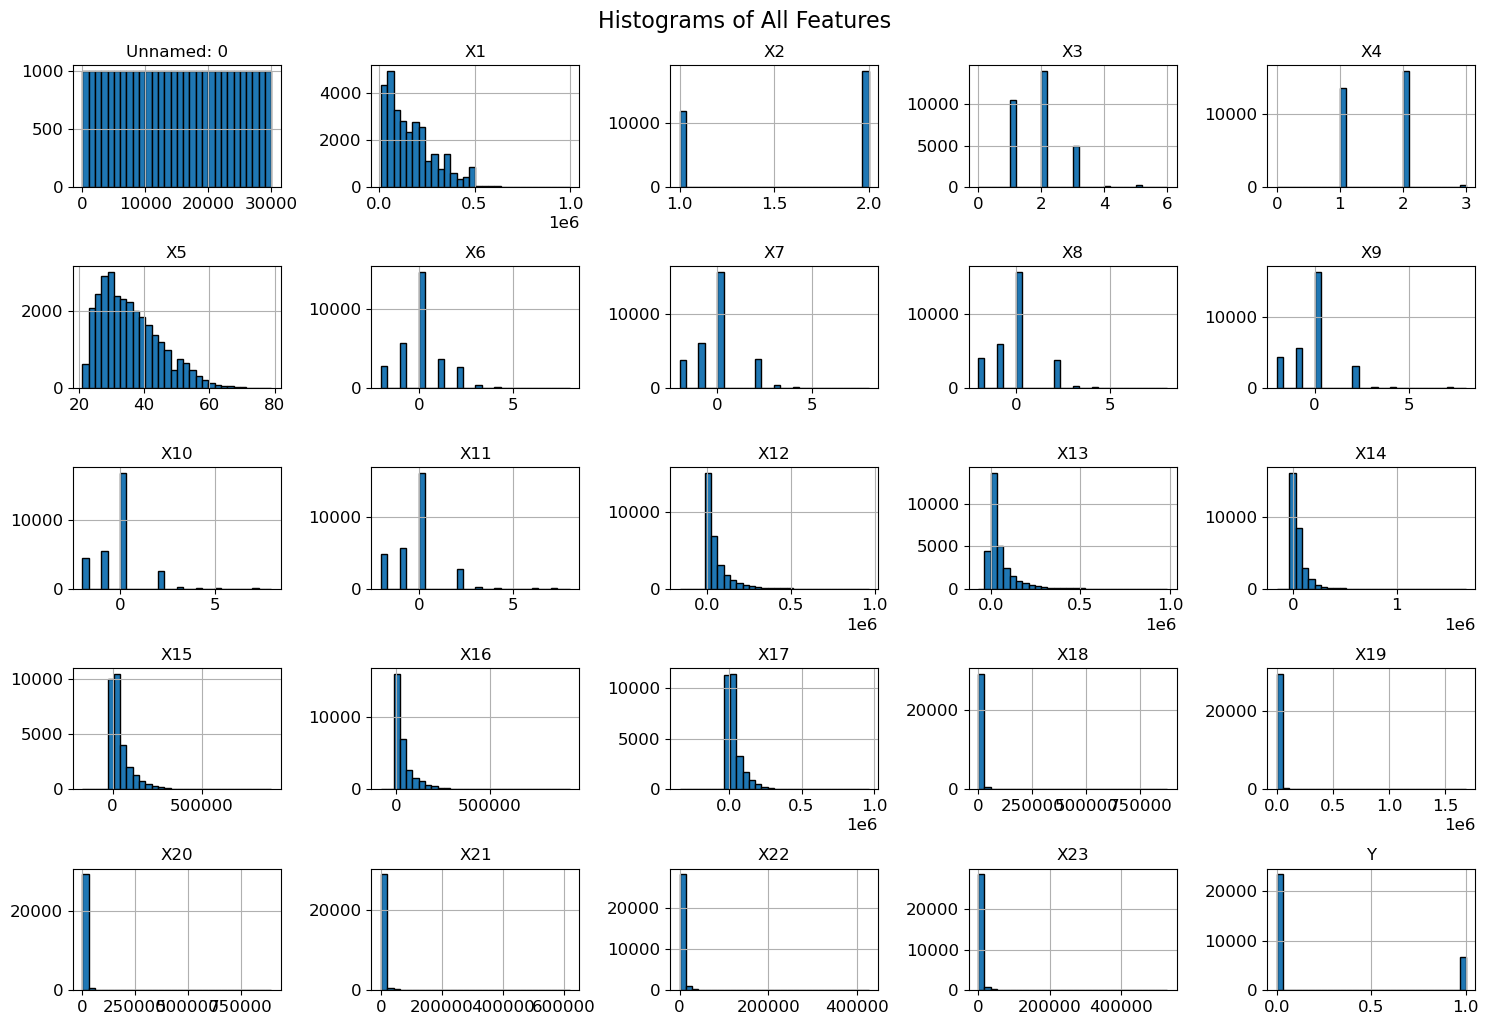

In [80]:
# Histogram for all numeric features
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.suptitle('Histograms of All Features', fontsize=16, y=1.02)
plt.show()

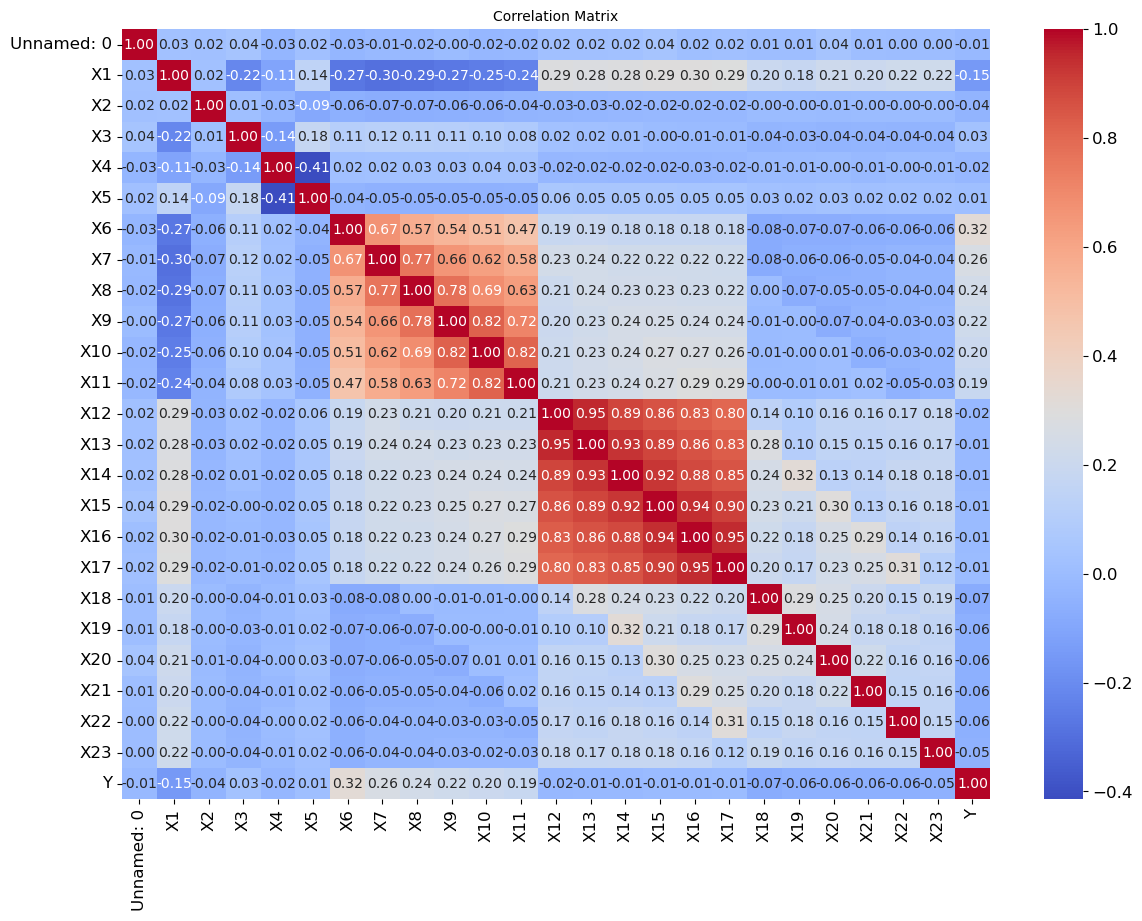

In [82]:
# Correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=10)
plt.show()

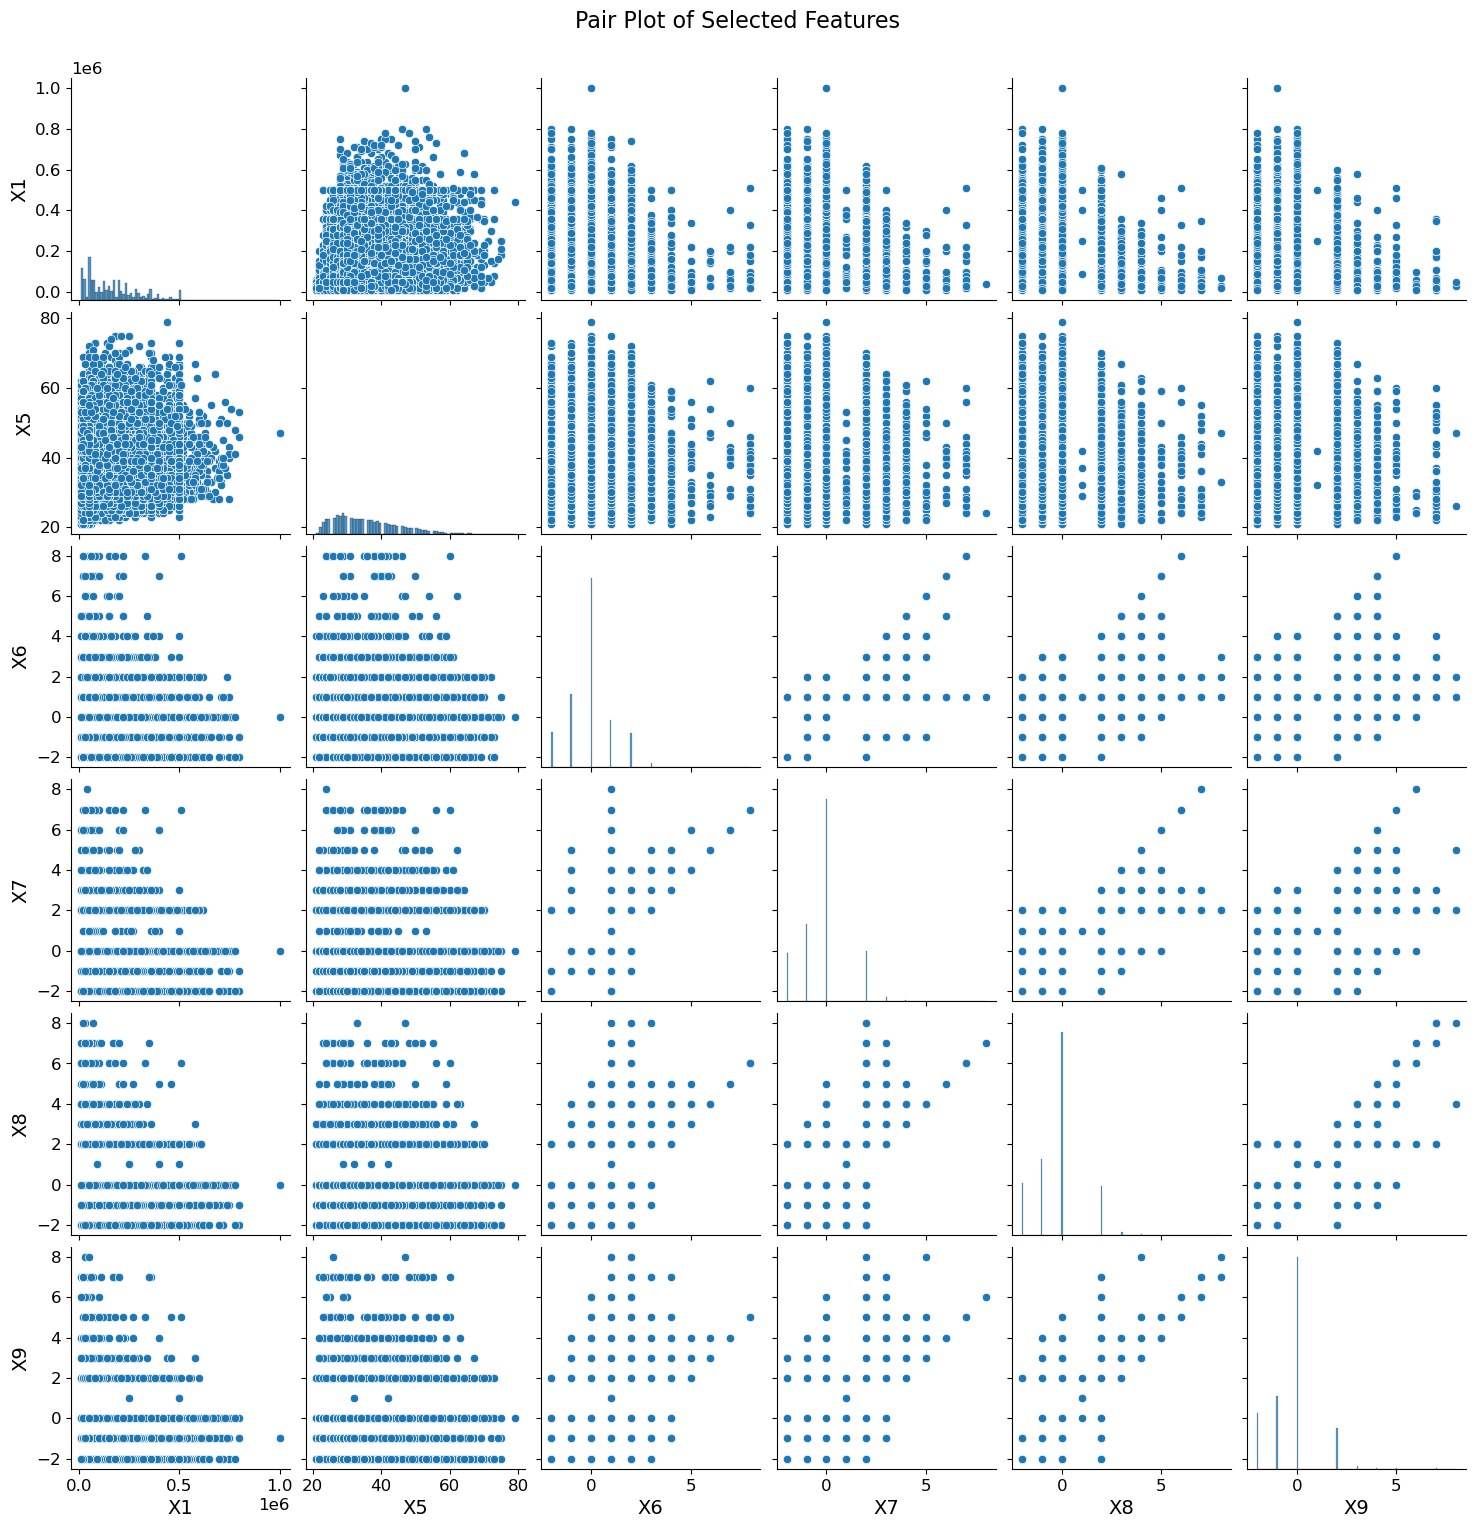

In [84]:
# Pair plot for a subset (to avoid too many plots)
subset = ['X1', 'X5', 'X6', 'X7', 'X8', 'X9'] 
sns.pairplot(df[subset], diag_kind='hist')
plt.suptitle('Pair Plot of Selected Features', fontsize=16, y=1.02)
plt.show()

## Data Preprocessing

In [86]:
# Load packages for data preprocessing

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [90]:
# Drop ID column
df = df.drop(df.columns[0], axis=1)

df.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [92]:
# Split features and target
X = df.drop(columns='Y')  # Replace 'Y' with your actual target variable name
y = df['Y']

# Split into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [94]:
# Build a pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # Fills missing values
    ('scaler', StandardScaler()),                  # Standardize features
    ('classifier', LogisticRegression())           # Default model: Logistic Regression
])

In [96]:
# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores (5-fold):", cv_scores)
print("Average CV accuracy:", np.mean(cv_scores).round(4))

Cross-validation scores (5-fold): [0.80625    0.8125     0.80479167 0.816875   0.80520833]
Average CV accuracy: 0.8091


In [98]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
test_accuracy = pipeline.score(X_test, y_test)
print("Test accuracy:", round(test_accuracy, 4))

Test accuracy: 0.813


## Classification

In [101]:
# Load packages for classification

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [105]:
RANDOM_STATE = 123

# Create base pipeline
base_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=RANDOM_STATE))  # placeholder
])

#a. RANDOM FOREST: GridSearchCV
param_grid_rf = {
    'model': [RandomForestClassifier(random_state=RANDOM_STATE)],
    'model__n_estimators': [4, 5, 10, 20, 50]
}

grid_rf = GridSearchCV(base_pipeline, param_grid=param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Random Forest ROC AUC (CV):", round(grid_rf.best_score_, 4))

Best Random Forest Params: {'model': RandomForestClassifier(random_state=123), 'model__n_estimators': 50}
Best Random Forest ROC AUC (CV): 0.7552


In [107]:
# b. KNN: GridSearchCV
param_grid_knn = {
    'model': [KNeighborsClassifier()],
    'model__n_neighbors': [3, 5, 10, 20]
}

grid_knn = GridSearchCV(base_pipeline, param_grid=param_grid_knn, cv=5, scoring='roc_auc')
grid_knn.fit(X_train, y_train)

print("Best KNN Params:", grid_knn.best_params_)
print("Best KNN ROC AUC (CV):", round(grid_knn.best_score_, 4))

Best KNN Params: {'model': KNeighborsClassifier(), 'model__n_neighbors': 20}
Best KNN ROC AUC (CV): 0.7406


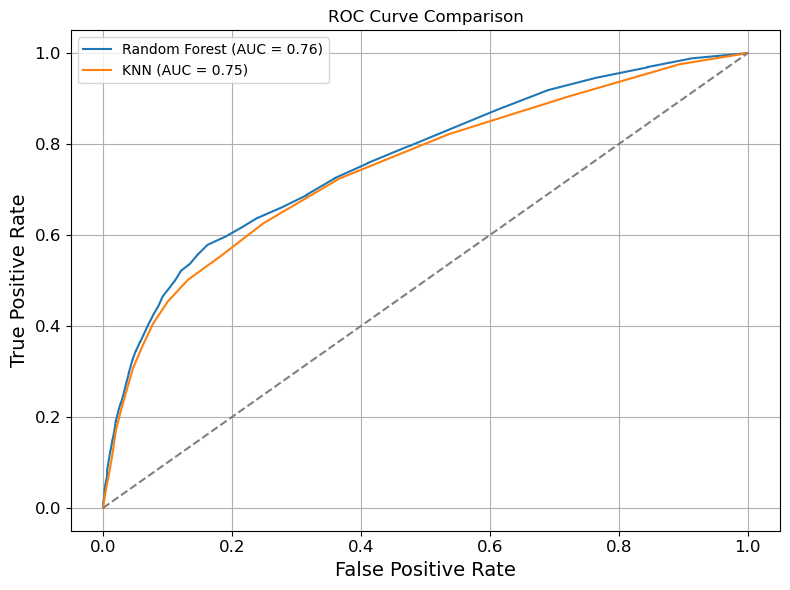

In [109]:
# Compare Best Models on Test Set with ROC Curv
def plot_roc(model, X_test, y_test, label=None):
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    return fpr, tpr, thresholds

plt.figure(figsize=(8, 6))
plot_roc(grid_rf.best_estimator_, X_test, y_test, label='Random Forest')
plot_roc(grid_knn.best_estimator_, X_test, y_test, label='KNN')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#### Conclusions 
(3 marks)

Explain your results and choices

# Observation 1:

Best Random Forest ROC AUC (CV): 0.7552
Best KNN ROC AUC (CV): 0.7406

# Comment 1: 
Random Forest has a higher average ROC AUC across 5 folds.

# Observation 2:

From the test set performance, both models perform similarly on the test set, but Random Forest slightly outperforms KNN.

# Comment 2:
The ROC curve confirms that Random Forest provides slightly better classification ability in terms of distinguishing between positive and negative cases.


# Overall Comment:
Based on both cross-validation and test AUC, Random Forest performs better and would be the recommended classifier for this dataset.                                                                          
